<a href="https://colab.research.google.com/github/rodeledjan/Data_Science_and_Machine_Learning/blob/main/MarketingCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation and Analysis for a Retail Client**

Business Problem <br>
An international retail company wants to better understand its customer base in order to:


*   Increase customer retention
*   Design targeted marketing campaigns
*   Maximize customer lifetime value
*   Identify high-value customers vs those at risk of churn

At the moment, we treat all customers the same, regardless of spend. This one-size fits all approach is resulting in wasted budget and lower revenue. Management has tasked you with suggesting and implementing a new marketing strategy that will better serve their financial goals.


###Project Objective
Use customer transaction data to:
- identify and categorize customer segments and customer types
- generate insights for business and marketing teams




## Data Set Summary
- Peope
- Product
- Promotion
- Place

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Load the csv file to a dataframe, then display the head and tail.
df=pd.read_csv('/content/marketing_campaign.csv', sep='\t')
print("First 5 rows of the dataset: \n")
print(df.head())
print("\n" + "Last 5 rows of the dataset: \n")
print(df.tail())

First 5 rows of the dataset: 

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCm

In [ ]:
df.shape #2240 rows, 29 columns

(2240, 29)

In [ ]:
df.info() #look at the Dt_Customer as object, why is it not a date?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum() #easier to use than isnotnull, identify if the number of nulls are significant.  In this case, 24 of 2240 is about 1%, so we can remove them.

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.dropna(inplace=True) #takes care of dropping all nulls, no need to specify a specific column

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'] ,dayfirst=True) # this is a European dataset.  Europeans have the format dd.mm.yyyy
df.columns = df.columns.str.strip()

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [ ]:
df.describe(include='object') # just describes the object

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


##Creating Features

Added the following features: Age, With Children, Customer Since, Education, Marital Status, Family Size, TotalAcceptedCmp, Monetary, Frequency

In [ ]:
df['Age'] = 2025 - df['Year_Birth'] #used 2025 to make it easy
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [ ]:
df['With_children'] =  ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int) # new category
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,With_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,1


In [ ]:
df['Customer_Since'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,With_children,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,0,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,1,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,1,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,1,161


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,With_children,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,0,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,1,113
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,0,312
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,1,139
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,1,161


In [ ]:
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].apply(lambda x: 2 if x == 'Partnered' else 1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,With_children,Customer_Since,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,0,663,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,1,113,3
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,0,312,1
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,1,139,2
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,1,161,2


In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCmp'] = df[campaigns].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,With_children,Customer_Since,Family_Size,TotalAcceptedCmp,Monetary,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,663,1,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,1,113,3,0,27,4
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,312,1,0,776,20
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,139,2,0,53,6
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,161,2,0,422,14


In [ ]:
drop_cols = [
    'Year_Birth', 'Dt_Customer','Kidhome', 'Teenhome',  'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5',
    'Z_CostContact'	,'Z_Revenue'
]
df.drop(columns=drop_cols, inplace=True)


In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'With_children', 'Customer_Since', 'Family_Size', 'TotalAcceptedCmp',
       'Monetary', 'Frequency'],
      dtype='object')

In [ ]:
# df['TotalAcceptedCmp'].value_counts()
# 1757 individuals did not accept a campaign?
# at least 323 accepted 1 campaing
# I can't tell which campaign had the most acceptance
# the success rate isn't great, the retailer needs to segment the customers better and tailor the campaigns based on segmentation

In [ ]:
df_recency = df[['ID', 'Recency']]
df_recency.head()

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94


In [ ]:
df['Frequency'].value_counts()

frequency_df = df[['ID', 'Frequency']]
frequency_df.head()
# frequency_df.count()

,ID,Frequency
0,5524,22
1,2174,4
2,4141,20
3,6182,6
4,5324,14


In [ ]:
# df['Monetary'].value_counts()

monetary_df = df.groupby(by='ID', as_index=False)['Monetary'].sum()
monetary_df.columns = ['ID', 'Monetary']
monetary_df.head()

,ID,Monetary
0,0,1198
1,1,577
2,9,120
3,13,32
4,17,1028


In [ ]:
#combine Recency, Frequency and Monetary
rf_df = df_recency.merge(frequency_df, on='ID')
rfm_df = rf_df.merge(monetary_df, on='ID')
rfm_df.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [ ]:
#Rank the customers
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,5524,58,22,1617,894.0,1956.0,2037.5
1,2174,38,4,27,1348.0,238.5,155.0
2,4141,26,20,776,1620.0,1791.0,1429.0
3,6182,26,6,53,1620.0,611.5,413.5
4,5324,94,14,422,113.5,1243.5,1146.0


In [ ]:
#Normalize the ranks, then drop the individual ranks
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,5524,58,22,1617,40.590238,88.306998,91.965696
1,2174,38,4,27,61.203178,10.767494,6.996163
2,4141,26,20,776,73.552781,80.857788,64.500113
3,6182,26,6,53,73.552781,27.607223,18.663958
4,5324,94,14,422,5.153235,56.139955,51.726473


In [ ]:
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df[['ID', 'RFM_Score']].head(7)

,ID,RFM_Score
0,5524,4.16
1,2174,0.81
2,4141,3.52
3,6182,1.47
4,5324,2.30
5,7446,3.54
6,965,3.12


In [ ]:
#Segment the customers
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
                                       np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
                                                np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer",
                                                         np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customer', 'Lost Customer'))))
rfm_df.head()

,ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,5524,58,22,1617,40.59,88.31,91.97,4.16,High value Customer
1,2174,38,4,27,61.20,10.77,7.00,0.81,Lost Customer
2,4141,26,20,776,73.55,80.86,64.50,3.52,Medium Value Customer
3,6182,26,6,53,73.55,27.61,18.66,1.47,Lost Customer
4,5324,94,14,422,5.15,56.14,51.73,2.30,Low Value Customer


##High Value Customer Profile

In [ ]:
df_HighValue  = rfm_df[rfm_df['Customer_segment'].isin(['High value Customer', 'Top Customers'])]
# df = df.drop(columns=['Frequency_y', 'Recency_y'])

df_HighValue_2 = pd.merge(df_HighValue, df, on='ID', how='left')


In [ ]:
# print(df_HighValue.count())
print(df_HighValue_2.count())

# df_HighValue_With_Kids = df_HighValue_2.where(df_HighValue_2['Family_Size'] == 1) #right back to school campaign might not be a good option
df_HighValue_With_Kids = df_HighValue_2.where(df_HighValue_2['Age'] > 40) #right back to school campaign might not be a good option

df_HighValue_With_Kids.count()

ID                   271
Recency_x            271
Frequency_x          271
Monetary_x           271
R_rank_norm          271
F_rank_norm          271
M_rank_norm          271
RFM_Score            271
Customer_segment     271
Education            271
Marital_Status       271
Income               271
Recency_y            271
NumDealsPurchases    271
NumWebVisitsMonth    271
Complain             271
Response             271
Age                  271
With_children        271
Customer_Since       271
Family_Size          271
TotalAcceptedCmp     271
Monetary_y           271
Frequency_y          271
dtype: int64


,0
ID,240
Recency_x,240
Frequency_x,240
Monetary_x,240
R_rank_norm,240
F_rank_norm,240
M_rank_norm,240
RFM_Score,240
Customer_segment,240
Education,240


##Medium Value Customer Profile

In [ ]:
df_MediumValue  = rfm_df[rfm_df['Customer_segment'].isin(['Medium Value Customer'])]
# df = df.drop(columns=['Frequency_y', 'Recency_y'])

df_MediumValue_2 = pd.merge(df_MediumValue, df, on='ID', how='left')
print(df_MediumValue_2.count())

#df_MediumValue_2_With_Kids = df_MediumValue_2.where(df_MediumValue_2['Family_Size'] > 2) #57 with families, small right back to school campaign might not be a good option
df_MediumValue_2_With_Kids = df_MediumValue_2.where(df_MediumValue_2['Age'] > 40) #right back to school campaign might not be a good option

df_MediumValue_2_With_Kids.count() #57 with family,  571 was above 40


ID                   622
Recency_x            622
Frequency_x          622
Monetary_x           622
R_rank_norm          622
F_rank_norm          622
M_rank_norm          622
RFM_Score            622
Customer_segment     622
Education            622
Marital_Status       622
Income               622
Recency_y            622
NumDealsPurchases    622
NumWebVisitsMonth    622
Complain             622
Response             622
Age                  622
With_children        622
Customer_Since       622
Family_Size          622
TotalAcceptedCmp     622
Monetary_y           622
Frequency_y          622
dtype: int64


,0
ID,571
Recency_x,571
Frequency_x,571
Monetary_x,571
R_rank_norm,571
F_rank_norm,571
M_rank_norm,571
RFM_Score,571
Customer_segment,571
Education,571


In [ ]:
rfm_df.head()

,ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,5524,58,22,1617,40.59,88.31,91.97,4.16,High value Customer
1,2174,38,4,27,61.20,10.77,7.00,0.81,Lost Customer
2,4141,26,20,776,73.55,80.86,64.50,3.52,Medium Value Customer
3,6182,26,6,53,73.55,27.61,18.66,1.47,Lost Customer
4,5324,94,14,422,5.15,56.14,51.73,2.30,Low Value Customer


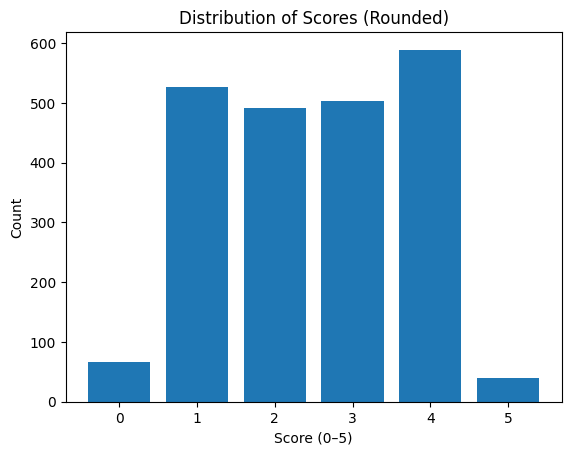

In [ ]:
rfm_df['Binned'] = rfm_df['RFM_Score'].round().astype(int)
counts = rfm_df['Binned'].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xlabel('Score (0–5)')
plt.ylabel('Count')
plt.title('Distribution of Scores (Rounded)')
plt.show()

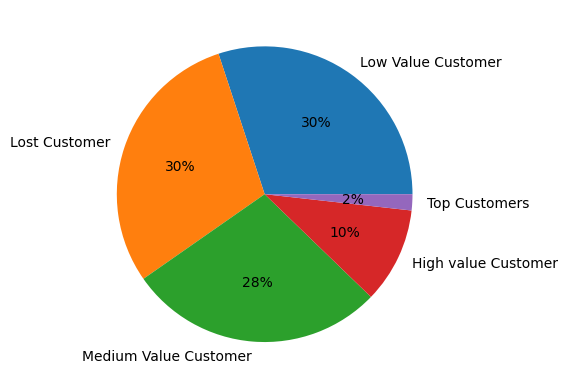

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

##Running further analysis on segments

Creating Box Plots

Recency
Frequency
Monetary


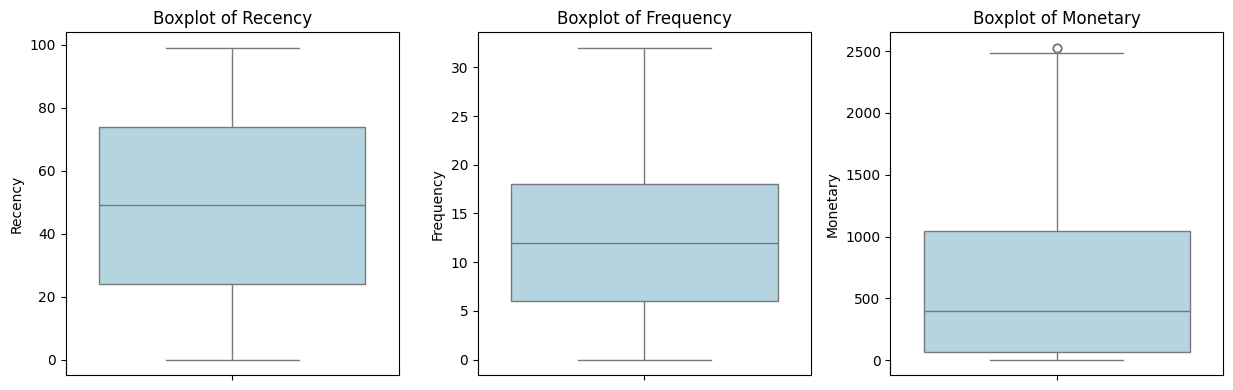

In [ ]:
rfm_df2 = rfm_df[['ID', 'Recency', 'Frequency','Monetary' ]]

plt.figure(figsize=(16, 4))

for i, col in enumerate(rfm_df2.columns):
  if col != 'ID':

    plt.subplot(1, 4, i+1)
    sns.boxplot(y=rfm_df2[col], color="lightblue")
    plt.title(f'Boxplot of {col}')
    print(col)

plt.tight_layout()
plt.show()

Distribution of columns

In [ ]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print("Outlier Counts in RFM Features:")
for col in rfm_df2.columns:

    print(f"{col}: {count_outliers_iqr(rfm_df2[col])} outliers")

Outlier Counts in RFM Features:
ID: 0 outliers
Recency: 0 outliers
Frequency: 0 outliers
Monetary: 3 outliers


In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: upper if x > upper else (lower if x < lower else x))

rfm_df2['Monetary_Capped'] = cap_outliers(rfm_df2['Monetary'])
rfm_df2.head()

/tmp/ipython-input-4167990030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df2['Monetary_Capped'] = cap_outliers(rfm_df2['Monetary'])


,ID,Recency,Frequency,Monetary,Monetary_Capped
0,5524,58,22,1617,1617.0
1,2174,38,4,27,27.0
2,4141,26,20,776,776.0
3,6182,26,6,53,53.0
4,5324,94,14,422,422.0


In [ ]:
rfm_df2['Monetary'] = rfm_df2['Monetary_Capped']
rfm_df2.drop('Monetary_Capped', axis=1, inplace=True)

/tmp/ipython-input-4131250115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df2['Monetary'] = rfm_df2['Monetary_Capped']
/tmp/ipython-input-4131250115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df2.drop('Monetary_Capped', axis=1, inplace=True)


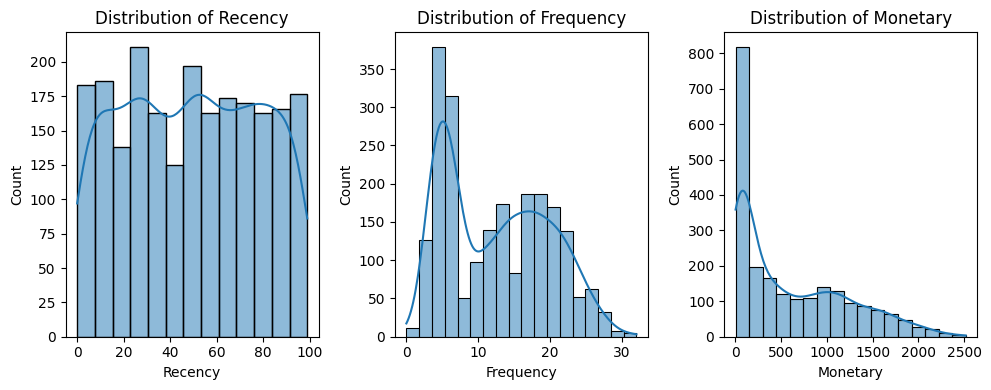

In [ ]:
plt.figure(figsize=(16, 4))

for i, col in enumerate(rfm_df2.columns):
  if col != 'ID':
    plt.subplot(1, 5, i+1)
    sns.histplot(rfm_df2[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
#k clustering, determine how many cluster we want
rfm_log = rfm_df2.copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm_df2.index , columns=rfm_df2.columns)

Finding the optimal K using the following methods:
- Elbow method
- Silhouette method

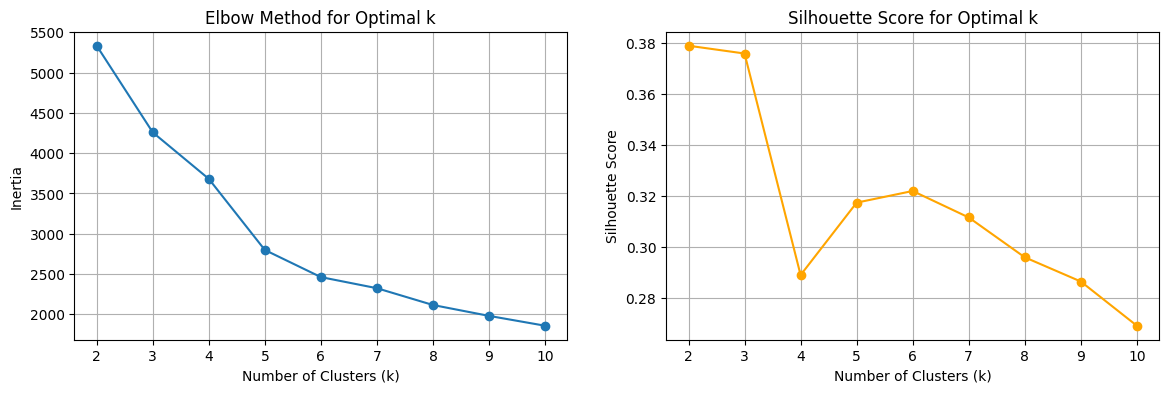

In [ ]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_lables = kmeans.fit_predict(rfm_scaled_df)
    sil_score = silhouette_score(rfm_scaled_df, cluster_lables)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
k_value = 3
kmeans = KMeans(k_value, random_state=42) #random_state 42 is standar
cluster_labels = kmeans.fit_predict(rfm_scaled_df)
rfm_df2['cluster_labels'] = cluster_labels

/tmp/ipython-input-3882135250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df2['cluster_labels'] = cluster_labels


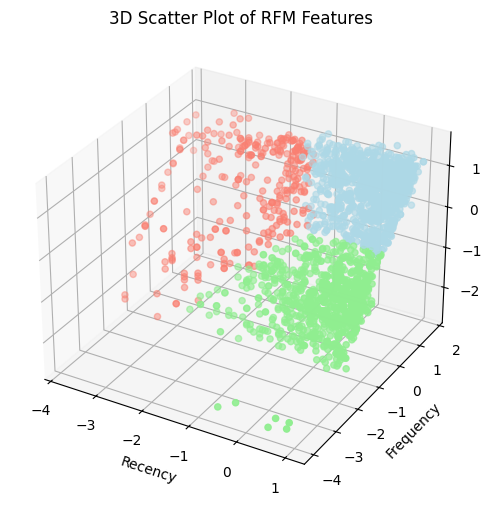

In [ ]:
# cluster_colors = {0: 'salmon', 1: 'lightblue', 2: 'lightgreen', 3:'purple', 4:'orange'}
cluster_colors = {0: 'salmon', 1: 'lightblue', 2: 'lightgreen'}

colors = rfm_df2['cluster_labels'].map(cluster_colors)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_scaled_df['Recency'], rfm_scaled_df['Frequency'], rfm_scaled_df['Monetary'],c=colors,marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of RFM Features')
plt.show()

In [ ]:
rfm_df2
rfm_mean = rfm_df2.groupby('cluster_labels')[['Recency', 'Frequency','Monetary']].mean()

rfm_mean['NumCustomers'] = rfm_df2['cluster_labels'].value_counts().sort_index()
rfm_mean = rfm_mean.reset_index()
print(rfm_mean)


   cluster_labels    Recency  Frequency     Monetary  NumCustomers
0               0   5.974910  14.021505   677.218638           279
1               1  56.938869  17.841241  1000.947536          1096
2               2  52.960761   5.185493    70.478002           841


Customer label 0, recency is very low compared to other clusters, frequency seems be on the higher side, monetary wise the total speding is in the middle compared to other customers.  They lowest number of customer type.  

Customer label 1 has the visited the store more recently compared to other cluster and they seem to be your most frequent customer as well and they spend the most money during their visits.  It seems like this cluster is our most valued customers.

Customer label 2 does not visit the store a lot and their average spending is the lowest among the three.  So I would say that these customer are the lowest spenders and most infrequent visitors.


In [ ]:
rfm_mean['RFM_Level'] = rfm_mean['cluster_labels'].map({
    0: 'Engaged',
    1: 'Retain',
    2: 'Hesitant'
})